# 创建测试数据集

In [5]:
import numpy as np # import everything from numpy
import operator # operator module

def createDataSet():
    # there are two [] for array 
    group=np.array([[1.0,1.1],[1.0,1.0],[0,0],[0,0.1]]) 
    labels=['A','A','B','B']
    return group, labels

In [6]:
group,labels=createDataSet()

In [7]:
group

array([[1. , 1.1],
       [1. , 1. ],
       [0. , 0. ],
       [0. , 0.1]])

In [8]:
labels

['A', 'A', 'B', 'B']

# KNN算法过程：
    （1）计算已知类别数据集中的点与当前点之间的距离(距离度量：欧氏距离）
    （2）按照距离递增排序
    （3）选取与当前点距离最小的K个点
    （4）确定K个点所在各个类别的频率
    （5）返回频率最高的类别作为当前点的预测分类（决策方式：多数表决）

# KNN 算法实现

In [9]:
import numpy as np
import operator


def classify0(inX, dataSet, labels, k):
    dataSetSize = dataSet.shape[0]
    # numpy.tile(A,reps) tile共有2个参数，A指待输入数组，reps则决定A重复的次数。整个函数用于重复数组A来构建新的数组。
    # 构建与样本数组同型的数组
    diffMat = np.tile(inX, (dataSetSize, 1)) - dataSet
    sqDiffMat = diffMat**2
    # sum 默认的axis=0 就是普通的相加 而当加入axis=1以后就是将一个矩阵的每一行向量相加
    sqDistances = sqDiffMat.sum(axis=1)
    distances = sqDistances**0.5
    # argsort()将数组元素从小到大排序，返回index数组，默认axis=1 按行排序，axis=0时按列排序
    sortedDistIndicies = distances.argsort()
    classCount = {}
    for i in range(k):
        voteIlabel = labels[sortedDistIndicies[i]]
        # get返回指定键的值，如果值不在字典中返回默认值
        classCount[voteIlabel] = classCount.get(voteIlabel, 0) + 1
        #sorted 返回一个list， classCount.items()返回 [(key,value)] list operator.itemgetter 指定按照哪一个
        #元素进行排序 reverse=True 降序排列
    sortedClassCount = sorted(classCount.items(), key=operator.itemgetter(1), reverse=True)
    return sortedClassCount[0][0]

#  分类器测试

In [10]:
classify0([0,0],group,labels,3)

'B'

In [11]:
classify0([1.45,0.11],group,labels,3)

'A'

# 使用k近邻算法改进约会网站的匹配效果

## 准备数据，从文本文件中构建数据集

    DatingTestSet.txt的结构如下：
    40920	8.326976	0.953952	largeDoses
    14488	7.153469	1.673904	smallDoses
    26052	1.441871	0.805124	didntLike
    75136	13.147394	0.428964	didntLike
    ...
    前三项分别为：每年的飞行里程数， 玩游戏所耗时间比， 每周消耗冰激凌的公升数

In [12]:
import numpy as np
def file2matrix(filename):
    # 构建标签与数字的对应字典
    love_dictionary = {'largeDoses':3, 'smallDoses':2, 'didntLike':1}
    fr = open(filename)
    # realines() return the list of lines
    arrayOLines = fr.readlines()
    numberOfLines = len(arrayOLines)            #get the number of lines in the file
    # 构建数据集矩阵
    returnMat = np.zeros((numberOfLines, 3))        #prepare matrix to return
    # construct the labels vector
    classLabelVector = []                       #prepare labels return
    # index is the row index of the matrix
    index = 0
    for line in arrayOLines:
        # get rid of the spaces at the front and the end of every line
        line = line.strip()
        # split the string into list by tab
        listFromLine = line.split('\t')
        # put the data which are the first three elements of the listFromline into every row
        returnMat[index, :] = listFromLine[0:3]
        # put the label which is the fourth element of listFromline into labels vector
        if(listFromLine[-1].isdigit()):
            classLabelVector.append(int(listFromLine[-1]))
        else:
            classLabelVector.append(love_dictionary.get(listFromLine[-1]))
        index += 1
    return returnMat, classLabelVector


In [13]:
datingDataMat, datingLabels=file2matrix('D:/pythoncode/machine learning in action/DatingTestSet.txt')

In [14]:
print(datingDataMat)

[[4.0920000e+04 8.3269760e+00 9.5395200e-01]
 [1.4488000e+04 7.1534690e+00 1.6739040e+00]
 [2.6052000e+04 1.4418710e+00 8.0512400e-01]
 ...
 [2.6575000e+04 1.0650102e+01 8.6662700e-01]
 [4.8111000e+04 9.1345280e+00 7.2804500e-01]
 [4.3757000e+04 7.8826010e+00 1.3324460e+00]]


In [15]:
print(datingLabels)

[3, 2, 1, 1, 1, 1, 3, 3, 1, 3, 1, 1, 2, 1, 1, 1, 1, 1, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 2, 1, 3, 1, 3, 1, 2, 1, 1, 2, 3, 3, 1, 2, 3, 3, 3, 1, 1, 1, 1, 2, 2, 1, 3, 2, 2, 2, 2, 3, 1, 2, 1, 2, 2, 2, 2, 2, 3, 2, 3, 1, 2, 3, 2, 2, 1, 3, 1, 1, 3, 3, 1, 2, 3, 1, 3, 1, 2, 2, 1, 1, 3, 3, 1, 2, 1, 3, 3, 2, 1, 1, 3, 1, 2, 3, 3, 2, 3, 3, 1, 2, 3, 2, 1, 3, 1, 2, 1, 1, 2, 3, 2, 3, 2, 3, 2, 1, 3, 3, 3, 1, 3, 2, 2, 3, 1, 3, 3, 3, 1, 3, 1, 1, 3, 3, 2, 3, 3, 1, 2, 3, 2, 2, 3, 3, 3, 1, 2, 2, 1, 1, 3, 2, 3, 3, 1, 2, 1, 3, 1, 2, 3, 2, 3, 1, 1, 1, 3, 2, 3, 1, 3, 2, 1, 3, 2, 2, 3, 2, 3, 2, 1, 1, 3, 1, 3, 2, 2, 2, 3, 2, 2, 1, 2, 2, 3, 1, 3, 3, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 1, 1, 1, 2, 3, 2, 1, 3, 1, 3, 2, 2, 3, 1, 3, 1, 1, 2, 1, 2, 2, 1, 3, 1, 3, 2, 3, 1, 2, 3, 1, 1, 1, 1, 2, 3, 2, 2, 3, 1, 2, 1, 1, 1, 3, 3, 2, 1, 1, 1, 2, 2, 3, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 3, 2, 3, 3, 3, 3, 1, 2, 3, 1, 1, 1, 3, 1, 3, 2, 2, 1, 3, 1, 3, 2, 2, 1, 2, 2, 3, 1, 3, 2, 1, 1, 3, 3, 2, 3, 3, 2, 3, 1, 3, 1, 3, 3, 1, 3, 2, 1, 3, 

## 分析数据：Matplotlib 创建散点图

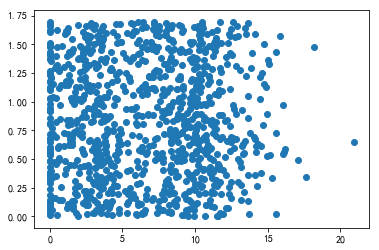

In [28]:
import matplotlib
import matplotlib.pyplot as plt
# creat a new figure
fig=plt.figure()
# creat axes add_subplot(row_quantity,column_quantity,position) used as figure.add_subplot
# the same as plt.subplot(row_quantity,column_quantity,position)
ax=fig.add_subplot(111)
# scatter(x,y)
#以玩游戏所耗时间比， 每周消耗冰激凌的公升数来构建散点图
ax.scatter(datingDataMat[:,1],datingDataMat[:,2])
plt.show()

为了更好地理解数据，利用datingLabels的标签属性，来绘制颜色不同，大小不同的点

In [17]:
# 设置datingLabels的颜色矩阵，用于为标记点上色
# labels is a labels list
import numpy as np
def labels2collor(labels):
    collormatsize=len(labels)
    # construct the collor matrix
    collormat=np.zeros((collormatsize,3))
    # red for largeDoses,green for smallDoses,blue for didntlike
    for i in range(len(labels)):
        if labels[i]==3:
            collormat[i]=[220,20,60]
        elif labels[i]==2:
            collormat[i]=[0,255,0]
        elif labels[i]==1:
            collormat[i]=[25,25,112]
    # RGB used in matplotlib must be float, divided by 255
    collormat=collormat/255
    return collormat


print(labels2collor(datingLabels))

[[0.8627451  0.07843137 0.23529412]
 [0.         1.         0.        ]
 [0.09803922 0.09803922 0.43921569]
 ...
 [0.8627451  0.07843137 0.23529412]
 [0.8627451  0.07843137 0.23529412]
 [0.8627451  0.07843137 0.23529412]]


In [18]:
import matplotlib
import matplotlib.pyplot as plt
# 为了显示中文字符
from pylab import *

def showfigure(datingDataMat,datingLabels):
    # 为了显示中文字符
    mpl.rcParams['font.sans-serif'] = ['SimHei']
    # creat a new figure，and set the size
    fig=plt.figure(figsize=(5,10),dpi=150)
    figurelabels=['none','didntlike','smallDoses','largeDoses']
    # creat axes add_subplot(row_quantity,column_quantity,position) used as figure.add_subplot
    # the same as plt.subplot(row_quantity,column_quantity,position)
    ax1=fig.add_subplot(211)
    # scatter(x,y,size,color) size and color must match x and y
    # 以玩游戏所耗时间比， 每周消耗冰激凌的公升数来构建散点图
    ax1.scatter(datingDataMat[:,1],datingDataMat[:,2],8.0*np.array(datingLabels),labels2collor(datingLabels))
     # set label names
    ax1.set_xlabel('玩游戏所耗时间比')
    ax1.set_ylabel('每周消耗冰激凌的公升数')
    ax1.set_title('Figure-1')
    ax2=fig.add_subplot(212)
    ax2.scatter(datingDataMat[:,0],datingDataMat[:,1],8.0*np.array(datingLabels),labels2collor(datingLabels))
    ax2.set_xlabel('每年的飞行行程数')
    ax2.set_ylabel('玩游戏所耗时间比')
    ax2.set_title('Figure-2')    
    plt.show()

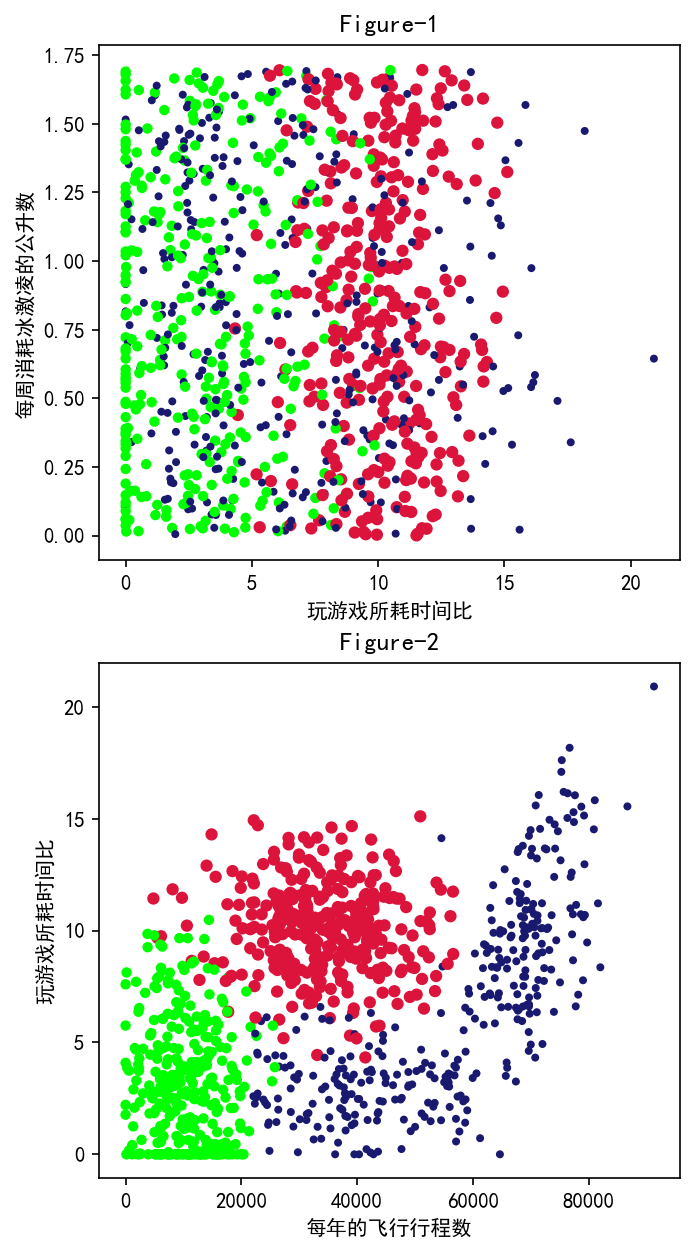

In [19]:
showfigure(datingDataMat,datingLabels)

## 归一化数值

由于飞行里程数值较大，在距离计算的过程中其影响远大于游戏时间和冰激凌消耗公升数对结果的影响，所以要对数据进行归一化处理。把各个特征值的取值范围转化为0到1区间内的值。转化的方式如下：

newvalue=(oldvalue-min)/(max-min)

增加一个autonorm()函数来将数值特征值转化到0到1的区间

In [20]:
import numpy as np
def autoNorm(dataSet):
    # min(0) return the min of the matrix rows
    minVals = dataSet.min(0)
    maxVals = dataSet.max(0)
    ranges = maxVals - minVals
    normDataSet = np.zeros(np.shape(dataSet))
    m = dataSet.shape[0]
    normDataSet = dataSet - np.tile(minVals, (m, 1))
    normDataSet = normDataSet/np.tile(ranges, (m, 1))   #element wise divide
    return normDataSet, ranges, minVals

In [21]:
autoNorm(datingDataMat)

(array([[0.44832535, 0.39805139, 0.56233353],
        [0.15873259, 0.34195467, 0.98724416],
        [0.28542943, 0.06892523, 0.47449629],
        ...,
        [0.29115949, 0.50910294, 0.51079493],
        [0.52711097, 0.43665451, 0.4290048 ],
        [0.47940793, 0.3768091 , 0.78571804]]),
 array([9.1273000e+04, 2.0919349e+01, 1.6943610e+00]),
 array([0.      , 0.      , 0.001156]))

## 测试算法：作为完整程序验证分类器

机器学习算法的一个很重要的方面就是测试其正确率，通常用数据的90%作为训练集，10%作为测试集，需要注意的是10%的测试集应该是随机选择的。在本例中，数据并没有按照特殊目的进行排序，所以可以随意选择10%。

In [22]:
def datingClassTest(filename):
    hRatio=0.1
    datingMat,datingLabels=file2matrix(filename)
    normDatingMat, ranges, minVals=autoNorm(datingMat)
    m=normDatingMat.shape[0]
    numTestVec=int(m*hRatio)
    errCount=0
    for i in range(numTestVec):
        classResult=classify0(normDatingMat[i,:],normDatingMat[numTestVec:m,:],datingLabels[numTestVec:m],4)
        print('the predicted result is {}, and the real answer is {}'.format(classResult,datingLabels[i]))
        if classResult!=datingLabels[i]:
            errCount+=1
    print('the error ratio is {}'.format(errCount/numTestVec))

    

In [23]:
datingClassTest('D:/pythoncode/machine learning in action/DatingTestSet.txt')

the predicted result is 3, and the real answer is 3
the predicted result is 2, and the real answer is 2
the predicted result is 1, and the real answer is 1
the predicted result is 1, and the real answer is 1
the predicted result is 1, and the real answer is 1
the predicted result is 1, and the real answer is 1
the predicted result is 3, and the real answer is 3
the predicted result is 3, and the real answer is 3
the predicted result is 1, and the real answer is 1
the predicted result is 3, and the real answer is 3
the predicted result is 1, and the real answer is 1
the predicted result is 1, and the real answer is 1
the predicted result is 2, and the real answer is 2
the predicted result is 1, and the real answer is 1
the predicted result is 1, and the real answer is 1
the predicted result is 1, and the real answer is 1
the predicted result is 1, and the real answer is 1
the predicted result is 1, and the real answer is 1
the predicted result is 2, and the real answer is 2
the predicte


## 使用算法：构建完整可用系统

In [24]:
def classifyPerson():
    # set resultList
    resultList = ['not at all', 'in small doses', 'in large doses']
    # input the percentage of time spent playing cideo games
    percentTats = float(input("percentage of time spent playing video games?"))
    # input flier miles
    ffMiles = float(input("frequent flier miles earned per year?"))
    # input liters of cream consumed per year
    iceCream = float(input("liters of ice cream consumed per year?"))
    # change dataset text to matrix return datingDataMat and datingLabels using file2matrix
    datingDataMat, datingLabels = file2matrix('D:/pythoncode/machine learning in action/DatingTestSet.txt')
    # normalize the datingDataMat, ranges and minVals matrix
    normMat, ranges, minVals = autoNorm(datingDataMat)
    # change the inputs into array
    inArr = np.array([ffMiles, percentTats, iceCream, ])
    # classify the input
    classifierResult = classify0((inArr - minVals)/ranges, normMat, datingLabels, 3)
    # print result
    print("You will probably like this person: %s" % resultList[classifierResult - 1])

In [25]:
classifyPerson()

percentage of time spent playing video games?10
frequent flier miles earned per year?10000
liters of ice cream consumed per year?0.5
You will probably like this person: in small doses


## K近邻算法改进约会网站匹配结果完整代码

In [29]:
import numpy as np
import operator
from os import listdir

def classify0(inX, dataSet, labels, k):
    dataSetSize = dataSet.shape[0]
    # numpy.tile(A,reps) tile共有2个参数，A指待输入数组，reps则决定A重复的次数。整个函数用于重复数组A来构建新的数组。
    # 构建与样本数组同型的数组
    diffMat = np.tile(inX, (dataSetSize, 1)) - dataSet
    sqDiffMat = diffMat**2
    # sum 默认的axis=0 就是普通的相加 而当加入axis=1以后就是将一个矩阵的每一行向量相加
    sqDistances = sqDiffMat.sum(axis=1)
    distances = sqDistances**0.5
    # argsort()将数组元素从小到大排序，返回index数组，默认axis=1 按行排序，axis=0时按列排序
    sortedDistIndicies = distances.argsort()
    classCount = {}
    for i in range(k):
        voteIlabel = labels[sortedDistIndicies[i]]
        # get返回指定键的值，如果值不在字典中返回默认值
        classCount[voteIlabel] = classCount.get(voteIlabel, 0) + 1
        #sorted 返回一个list， classCount.items()返回 [(key,value)] list operator.itemgetter 指定按照哪一个
        #元素进行排序 reverse=True 降序排列
    sortedClassCount = sorted(classCount.items(), key=operator.itemgetter(1), reverse=True)
    return sortedClassCount[0][0]


def createDataSet():
    group = np.array([[1.0, 1.1], [1.0, 1.0], [0, 0], [0, 0.1]])
    labels = ['A', 'A', 'B', 'B']
    return group, labels


def file2matrix(filename):
    love_dictionary={'largeDoses':3,'smallDoses':2,'didntLike':1}
    fr=open(filename)
    arrayOLines=fr.readlines()
    numberOfLines=len(arrayOLines)
    returnMat=np.zeros((numberOfLines,3))
    classLabelVector=[]
    index=0
    for line in arrayOLines:
        line=line.strip()
        listFromline=line.split('\t')
        returnMat[index,:]=listFromline[0:3]
        if (listFromline[-1].isdigit()):
            classLabelVector.append(listFromline[-1])
        else:
            classLabelVector.append(love_dictionary.get(listFromline[-1]))
        index +=1
    return returnMat, classLabelVector


    # self define
## 设置datingLabels的颜色矩阵，用于为标记点上色
# labels is a labels list
def labels2collor(labels):
    collormatsize=len(labels)
    # construct the collor matrix
    collormat=np.zeros((collormatsize,3))
    # red for largeDoses,green for smallDoses,blue for didntlike
    for i in range(len(labels)):
        if labels[i]==3:
            collormat[i]=[220,20,60]
        elif labels[i]==2:
            collormat[i]=[0,255,0]
        elif labels[i]==1:
            collormat[i]=[25,25,112]
    # RGB used in matplotlib must be float, divided by 255
    collormat=collormat/255
    return collormat


#self define
# plot the figure 
import matplotlib
import matplotlib.pyplot as plt
# 为了显示中文字符
from pylab import *

def showfigure(datingDataMat,datingLabels):
    # 为了显示中文字符
    mpl.rcParams['font.sans-serif'] = ['SimHei']
    # creat a new figure，and set the size
    fig=plt.figure(figsize=(7,12))
    figurelabels=['none','didntlike','smallDoses','largeDoses']
    # creat axes add_subplot(row_quantity,column_quantity,position) used as figure.add_subplot
    # the same as plt.subplot(row_quantity,column_quantity,position)
    ax1=fig.add_subplot(211)
    # scatter(x,y,size,color) size and color must match x and y
    # 以玩游戏所耗时间比， 每周消耗冰激凌的公升数来构建散点图
    ax1.scatter(datingDataMat[:,1],datingDataMat[:,2],8.0*np.array(datingLabels),labels2collor(datingLabels))
     # set label names
    ax1.set_xlabel('玩游戏所耗时间比')
    ax1.set_ylabel('每周消耗冰激凌的公升数')
    ax1.set_title('Figure-1')
    ax2=fig.add_subplot(212)
    ax2.scatter(datingDataMat[:,0],datingDataMat[:,1],8.0*np.array(datingLabels),labels2collor(datingLabels))
    ax2.set_xlabel('每年的飞行行程数')
    ax2.set_ylabel('玩游戏所耗时间比')
    ax2.set_title('Figure-2')    
    plt.show()



# autoNorm(dataset) dataset is an array
# 1.find the minVal and maxVal of every column of  matrix
# 2. use maxVal- minVal to construct a matrix as denominator with a shape of dataset :demat
# 3. use minVal to contruct a matrix with shape of dataset : minmat
# 4. use dataset-minmat as numerator: numat
# 5. the normmat is numat/demat
def autoNorm(dataset):
    maxval=dataset.max(0)
    minval=dataset.min(0)
    ranges=maxval-minval
    m=dataset.shape[0]
    demat=np.tile(ranges,(m,1))
    minmat=np.tile(minval,(m,1))
    numat=dataset-minmat
    #normat=np.zeros(dataset.shape)
    normat=numat/demat
    return normat,ranges, minval



# dataingClassTest(filename)
# set the hold ratio
# change the txt file into matrix: datingMat, datingLabels
# normalize the datingMat : normDatingMat
# seperate the data into two parts : trainMat, testMat
# set errCount
# use classify0 to classify the testMat with the trainMat as dataset
# print the classResult, and the real answer
# print the error ratio
def datingClassTest(filename):
    hRatio=0.1
    datingMat,datingLabels=file2matrix(filename)
    normDatingMat, ranges, minVals=autoNorm(datingMat)
    m=normDatingMat.shape[0]
    numTestVec=int(m*hRatio)
    errCount=0
    for i in range(numTestVec):
        classResult=classify0(normDatingMat[i,:],normDatingMat[numTestVec:m,:],datingLabels[numTestVec:m],3)
        print('the predicted result is {}, and the real answer is {}'.format(classResult,datingLabels[i]))
        if classResult!=datingLabels[i]:
            errCount+=1
    print('the error ratio is {}'.format(errCount/numTestVec))


def classifyPerson():
    # set resultList
    resultList = ['not at all', 'in small doses', 'in large doses']
    # input the percentage of time spent playing cideo games
    percentTats = float(input("percentage of time spent playing video games?"))
    # input flier miles
    ffMiles = float(input("frequent flier miles earned per year?"))
    # input liters of cream consumed per year
    iceCream = float(input("liters of ice cream consumed per year?"))
    # change dataset text to matrix return datingDataMat and datingLabels using file2matrix
    datingDataMat, datingLabels = file2matrix('D:/pythoncode/machine learning in action/DatingTestSet.txt')
    # normalize the datingDataMat, ranges and minVals matrix
    normMat, ranges, minVals = autoNorm(datingDataMat)
    # change the inputs into array
    inArr = np.array([ffMiles, percentTats, iceCream, ])
    # classify the input
    classifierResult = classify0((inArr - minVals)/ranges, normMat, datingLabels, 3)
    # print result
    print("You will probably like this person: %s" % resultList[classifierResult - 1])


